In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pims
import imageio

In [132]:
folder = 'J:\Alja Podgornik\Multimaze arena\Cohort 1_June 2020\\dlc_csv_outputs'
csvs = [csv for csv in os.listdir(folder) if csv.endswith('150000.csv')]
df = pd.read_csv(os.path.join(folder, csvs[0]), header=[1,2])
csvs[5]

'ChR7_Day2_processedDLC_resnet152_dlc_realApr6shuffle0_150000.csv'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000225FDFFA948>,
      dtype=object)

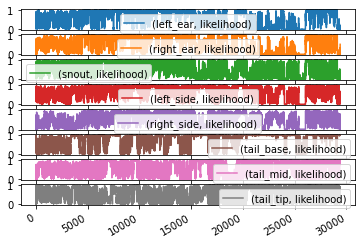

In [184]:
likelihood_mean = \
    df.loc[:, df.columns.get_level_values(1) == "likelihood"].mean(axis=1).mean()
likelihood_std = \
    df.loc[:, df.columns.get_level_values(1) == "likelihood"].mean(axis=1).std()

a = df.columns.get_level_values(1) == "likelihood"
b = df.columns.get_level_values(0) != "center"
c = df.columns.get_level_values(0) != "paw_f_right"
d = df.columns.get_level_values(0) != "paw_f_left"
e = df.columns.get_level_values(0) != "paw_h_left"
f = df.columns.get_level_values(0) != "paw_h_right"
g = a & b & c & d & e & f

df.loc[:, g].plot(subplots=True)

In [134]:
threshold = likelihood_mean - likelihood_std*1.96
threshold = 0.25

In [137]:
array = df.loc[:, df.columns.get_level_values(1) == "likelihood"].mean(axis=1) <= threshold
array.mean()

0.03854003673719301

In [2]:
video = pims.Video(r'J:\Alja Podgornik\Multimaze arena\Cohort 1_June 2020\Week 2\processed\other videos\HR5_day5_processed.mp4')
min_start = 0
sec_start = 37
min_end = 1
sec_end = 1
start = int((min_start*60 + sec_start) * video.frame_rate)
end = int((min_end*60 + sec_end) * video.frame_rate)
print(start, end)

1110 1830


In [3]:
cropped_video = video[start:end]
imageio.mimwrite(r"C:\Users\serce\Desktop\video.mp4", cropped_video, fps=video.frame_rate)

C:\Users\serce\AppData\Local\Continuum\anaconda3\envs\behaviour-switching\lib\site-packages\pims\pyav_reader.py:232: MethodDeprecationWarning: VideoStream.seek is deprecated.
  self._stream.seek(timestamp + self._first_pts)
